In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("data/train.csv")
test    = pd.read_csv("data/test.csv")
full_df = train.append(test, ignore_index = True)

In [3]:
types = train.columns.to_series().groupby(train.dtypes).groups
for k,v in types.items():
    print(k, v)

object ['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution', 'Address']
float64 ['X', 'Y']


In [4]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [5]:
train.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [6]:
train['Category'].describe()

count            878049
unique               39
top       LARCENY/THEFT
freq             174900
Name: Category, dtype: object

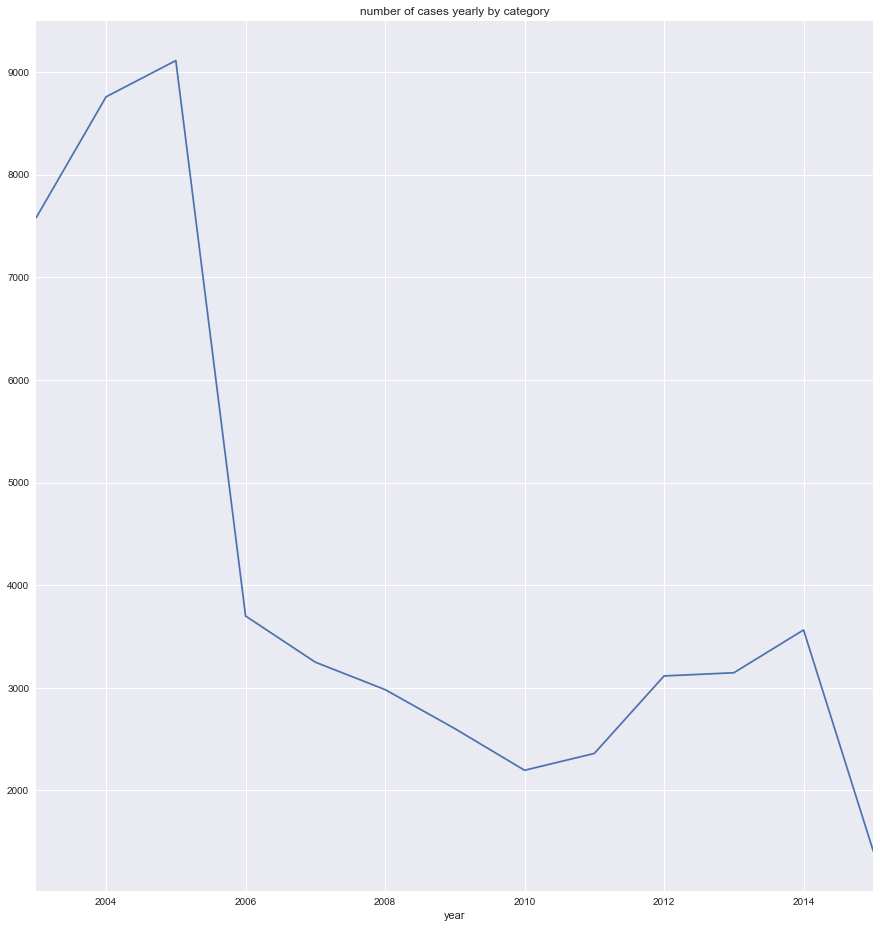

In [13]:
train['event']=1
train['Dates'] = pd.to_datetime(train['Dates'])
train['year'] = train['Dates'].apply(lambda x: x.year)
train.groupby(train['year'])['year'].agg({'Frequency':'count'})

year_events = train[['Category', 'year', 'event']].groupby(['Category', 'year']).count().reset_index()
year_events_pivot = year_events.pivot(index='year', columns='Category', values='event').fillna(method='ffill')
year_events_pivot['VEHICLE THEFT'].interpolate().plot(title='number of cases yearly by category', figsize=(15,16))

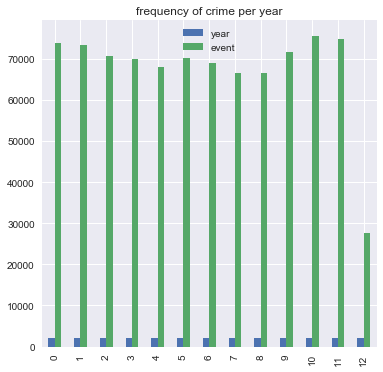

In [9]:

year_crime_events = train[['year','event']].groupby(['year']).count().reset_index()
year_crime_events.plot(kind='bar', figsize=(6, 6), title="frequency of crime per year")


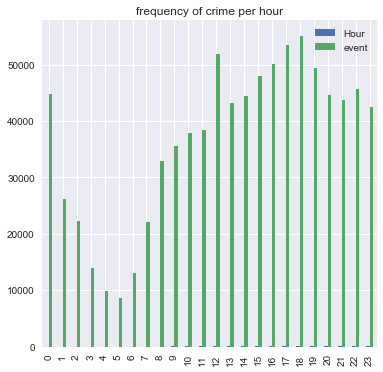

In [10]:
train['Hour'] = train['Dates'].map(lambda x: x.hour)

hourly_events = train[['Hour','event']].groupby(['Hour']).count().reset_index()
hourly_events.plot(kind='bar', figsize=(6, 6), title="frequency of crime per hour")


In [11]:
train['DayOfWeek'].describe()

count     878049
unique         7
top       Friday
freq      133734
Name: DayOfWeek, dtype: object

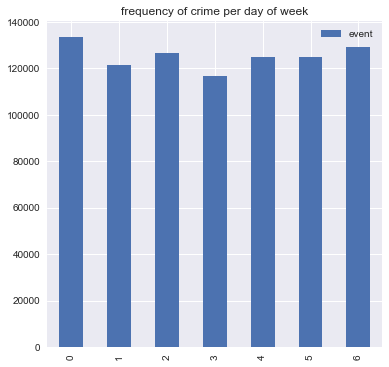

In [12]:
#train['Hour'] = train['Dates'].map(lambda x: x.hour)

dayofweek_events = train[['DayOfWeek','event']].groupby(['DayOfWeek']).count().reset_index()
dayofweek_events.plot(kind='bar', figsize=(6, 6), title="frequency of crime per day of week")


In [17]:
# locationType from address
# I want to extract the type of street from the address 
# "AV","BL","CR","CT","DR","EX","HWY","HY","LN","PL","PZ","RD","ST","TR","WY","WAY"

import re

def extractStreetType(x):
    types = r"AV|BL|CR|CT|DR|EX|HWY|HY|LN|PL|PZ|RD|ST|TR|WY|WAY"
    return re.search(types, x, flags=re.IGNORECASE).group()
    
train['StreetType'] = train.Address.apply(extractStreetType)

0

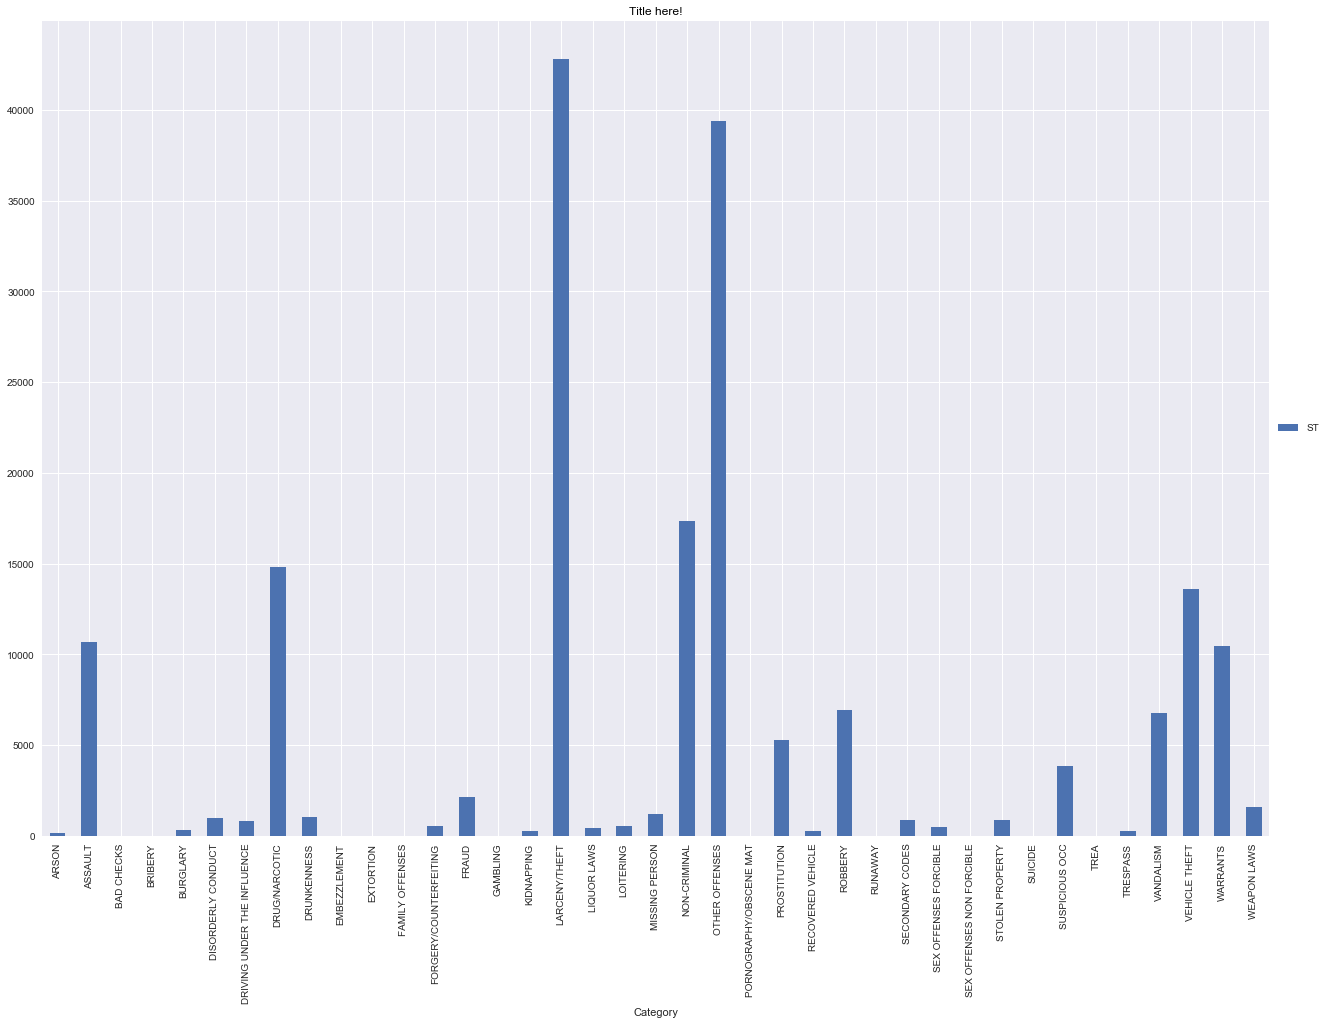

In [40]:
crime_by_street_type = train[['Category', 'StreetType', 'event']].groupby(['Category', 'StreetType']).count().reset_index()
crime_by_street_type_pv = crime_by_street_type.pivot(index='StreetType', columns='Category', values='event').fillna(method='ffill')


f = plt.figure()
plt.title('Title here!', color='black')
crime_by_street_type_pv.ix['ST'].plot(kind='bar', ax=f.gca(), figsize=(22, 15))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()